# 0 Utils

## 0.1 Imports and paths

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

data_folder = f'/home/janko/Desktop/social-dining/data'

pre_study_questionnaire_file = f'{data_folder}/questionnaires/Pre-StudyQuestionnaire.csv'
post_study_questionnaire_file = f'{data_folder}/questionnaires/Post-StudyQuestionnaire.csv'


## 0.2 Plotting

In [3]:
def get_colors_list(n):
    return list(mcolors.TABLEAU_COLORS.keys())[:n]


## 0.3 Statistics

In [4]:
def print_array_stats(arr, label):
    print(f"{label}:\n \t Min: {np.min(arr)} \t Max: {np.max(arr)} \t Mean: {np.mean(arr)} \t Std: {np.std(arr)} \t Median: {np.median(arr)}")

def print_item_counts(items, label):
    total_count = sum([v for _, v in items])
    print(f'{label}:')
    for k, v in items:
        print(f'\t{k}: {v} ({100 * v / total_count:.2f}%)')


## 0.4 Load questionnaire data

In [5]:
# Note: first two rows contain headers => use [2:]
pre_df = pd.read_csv(pre_study_questionnaire_file)[2:].reset_index(drop=True)
post_df = pd.read_csv(post_study_questionnaire_file)[2:].reset_index(drop=True)

# Sort by video id ({session_id}_{participant_position})
pre_df  = pre_df.sort_values(by=['I2', 'I3']).reset_index(drop=True)
post_df = post_df.sort_values(by=['I1', 'I2']).reset_index(drop=True)


# 1 Pre-study questionnaire

## 1.1 Data validation

In [5]:
assert all(pre_df['Progress'] == '100')
assert all(pre_df['Finished'] == 'True')
for i in range(len(pre_df) // 3):
    for j in range(3):
        # Session ID
        assert pre_df['I2'][i * 3 + j] == f'{i + 1:02d}', f"{i}_{j}: {pre_df['I2'][i * 3 + j]} != {i + 1:02d}"
        # Participant position
        assert pre_df['I3'][i * 3 + j] == f'{j + 1:01d}', f"{i}_{j}: {pre_df['I3'][i * 3 + j]} != {j + 1:01d}"


## 1.2 Meal time
Time when the meal was eaten (i.e. when the experiment was performed).

Meal time (when the meal started):
 	 Min: 9 	 Max: 20 	 Mean: 16.166666666666668 	 Std: 3.2360813064912666 	 Median: 17.5


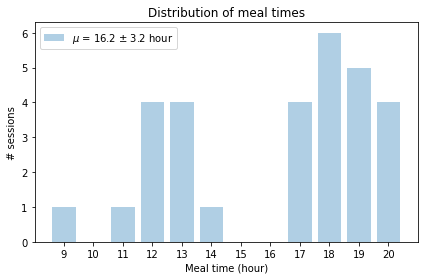

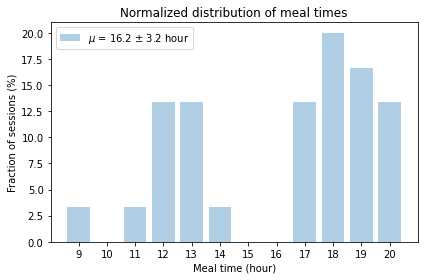

Meal times:
	Breakfast: 1 (3.33%)
	Lunch: 10 (33.33%)
	Dinner: 19 (63.33%)


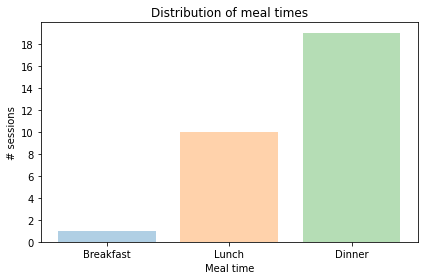

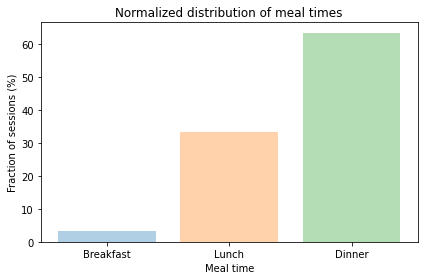

In [6]:
# Shift by two hours because the times (when the pre-study questionnaire was filled in) were automatically collected in the MDT time zone
meal_times = [ t.hour + 2 + (1 if t.minute > 30 else 0) for t in pd.to_datetime(pre_df['EndDate']) ]
for i in range(len(meal_times) // 3):
    # Check the meal times recorded for participants within one session agree
    assert len(set(meal_times[i * 3 : i * 3 + 3])) == 1, f'{i}: {meal_times[i * 3 : i * 3 + 3]}'
meal_times = meal_times[::3]
print_array_stats(meal_times, 'Meal time (when the meal started)')

plt.figure()
time_range = np.arange(min(meal_times), max(meal_times) + 2)
plt.bar(time_range[:-1], np.histogram(meal_times, bins=time_range)[0], alpha=0.35, label=fr'$\mu$ = {np.mean(meal_times):.1f} $\pm$ {np.std(meal_times):.1f} hour')
plt.legend()
plt.xticks(time_range[:-1], time_range[:-1])
plt.xlabel('Meal time (hour)')
plt.ylabel('# sessions')
plt.title("Distribution of meal times")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(time_range[:-1], np.histogram(meal_times, bins=time_range)[0] * 100 / 30, alpha=0.35, label=fr'$\mu$ = {np.mean(meal_times):.1f} $\pm$ {np.std(meal_times):.1f} hour')
plt.legend()
plt.xticks(time_range[:-1], time_range[:-1])
plt.xlabel('Meal time (hour)')
plt.ylabel('Fraction of sessions (%)')
plt.title("Normalized distribution of meal times")
plt.tight_layout()
plt.show()

# Categorize into breakfast, lunch, and dinner times
categorized_meal_times = dict(zip(['Breakfast', 'Lunch', 'Dinner'], np.histogram(meal_times, bins=[8, 10.5, 16, 21])[0]))
print_item_counts(categorized_meal_times.items(), 'Meal times')
plt.figure()
plt.bar(categorized_meal_times.keys(), categorized_meal_times.values(), alpha=0.35, color=get_colors_list(len(categorized_meal_times)))
plt.xlabel('Meal time')
plt.yticks(range(max(categorized_meal_times.values()) + 1)[::2])
plt.ylabel('# sessions')
plt.title("Distribution of meal times")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(categorized_meal_times.keys(), np.array(list(categorized_meal_times.values())) * 100 / 30, alpha=0.35, color=get_colors_list(len(categorized_meal_times)))
plt.xlabel('Meal time')
plt.ylabel('Fraction of sessions (%)')
plt.title("Normalized distribution of meal times")
plt.tight_layout()
plt.show()


## 1.3 Demographics

### 1.3.1 Age

Age:
 	 Min: 18 	 Max: 38 	 Mean: 21.844444444444445 	 Std: 3.4477403585895083 	 Median: 21.0


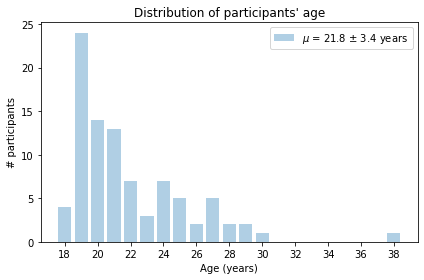

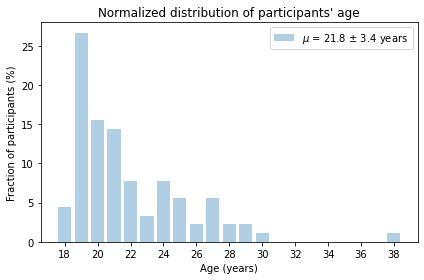

In [7]:
age = pd.to_numeric(pre_df['D1'])
print_array_stats(age, 'Age')

plt.figure()
age_range = np.arange(min(age), max(age) + 2)
plt.bar(age_range[:-1], np.histogram(age, bins=age_range)[0], alpha=0.35, label=fr'$\mu$ = {np.mean(age):.1f} $\pm$ {np.std(age):.1f} years')
plt.legend()
plt.xticks(age_range[::2])
plt.xlabel('Age (years)')
plt.ylabel('# participants')
plt.title("Distribution of participants' age")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(age_range[:-1], np.histogram(age, bins=age_range)[0] * 100 / 90, alpha=0.35, label=fr'$\mu$ = {np.mean(age):.1f} $\pm$ {np.std(age):.1f} years')
plt.legend()
plt.xticks(age_range[::2])
plt.xlabel('Age (years)')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' age")
plt.tight_layout()
plt.show()


### 1.3.2 Gender

Gender:
	Female: 56 (62.22%)
	Male: 34 (37.78%)


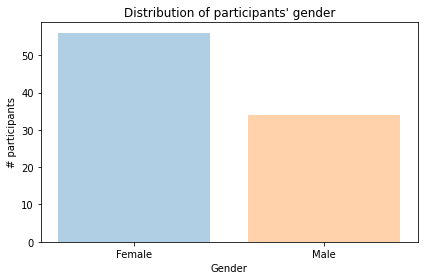

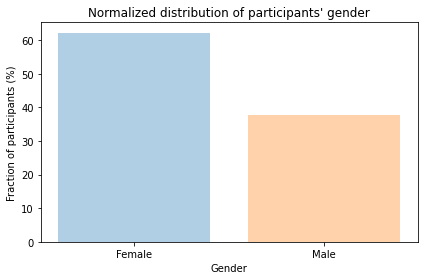

In [8]:
genders = Counter(pre_df['D2'])
print_item_counts(genders.items(), 'Gender')

plt.figure()
plt.bar(genders.keys(), genders.values(), alpha=0.35, color=get_colors_list(len(genders)))
plt.xlabel('Gender')
plt.ylabel('# participants')
plt.title("Distribution of participants' gender")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(genders.keys(), np.array(list(genders.values())) * 100 / 90, alpha=0.35, color=get_colors_list(len(genders)))
plt.xlabel('Gender')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' gender")
plt.tight_layout()
plt.show()


### 1.3.3 Race

Race:
	Asian: 39 (43.33%)
	White: 39 (43.33%)
	Black or African American: 3 (3.33%)
	Other or two/more races: 9 (10.00%)
		 White and Asian
		 Asian / Latino
		 white/Latino
		 Asian and white
		 Latinx
		 Latino
		 Asian/White
		 White and Hispanic
		 White/Latino


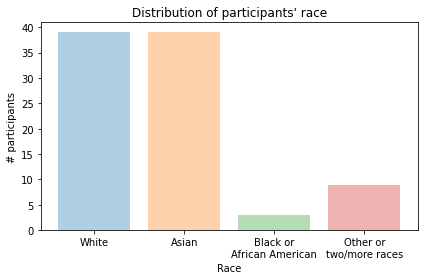

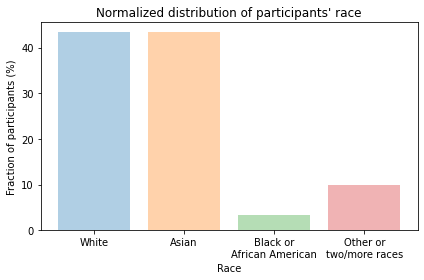

In [9]:
races_counter = Counter(pre_df['D3'])
print_item_counts(races_counter.items(), 'Race')

# Show details for 'Other or two/more races'
for i, race in enumerate(pre_df[f'D3']):
    if race == 'Other or two/more races':
        print(f"\t\t {pre_df[f'D3_6_TEXT'][i]}")

races_labels = [
    'White',
    'Asian',
    'Black or\nAfrican American',
    'Other or\ntwo/more races'
]
races_range = np.arange(len(races_counter))
races_values = races_counter.values()
plt.figure()
plt.bar(races_range, races_values, alpha=0.35, color=get_colors_list(len(races_counter)))
plt.xticks(races_range, races_labels)
plt.xlabel('Race')
plt.ylabel('# participants')
plt.title("Distribution of participants' race")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(races_range, np.array(list(races_values)) * 100 / 90, alpha=0.35, color=get_colors_list(len(races_counter)))
plt.xticks(races_range, races_labels)
plt.xlabel('Race')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' race")
plt.tight_layout()
plt.show()


In [ ]:
# If you want to further categorize the responses to 'Other or two/more races' into Hispanic, White-Asian, Asian-Hispanic, White-Hispanic
# then make the following changes to the Pre-StudyQuestionnaire.csv file and run this cell
# 02_2    White and Asian       => White-Asian
# 05_3    Asian / Latino        => Asian-Hispanic
# 09_1    white/Latino          => White-Hispanic
# 09_2    Asian and white       => White-Asian
# 15_1    Latinx                => Hispanic
# 15_3    Latino                => Hispanic
# 19_1    Asian/White           => White-Asian
# 21_3    White and Hispanic    => White-Hispanic
# 23_2    White/Latino          => White-Hispanic

races = []
for i, race in enumerate(pre_df['D3']):
    if race == 'Other or two/more races':
        races.append(pre_df['D3_6_TEXT'][i])
    else:
        races.append(race)

races = Counter(races).most_common()
print_item_counts(races, 'Race')

keys, values = zip(*races[::-1])
plt.figure()
plt.barh(keys, values, alpha=0.35, color=get_colors_list(len(races))[::-1])
plt.ylabel('Race')
plt.xlabel('# participants')
plt.title("Distribution of participants' race")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh(keys, np.array(values) * 100 / 90, alpha=0.35, color=get_colors_list(len(races))[::-1])
plt.ylabel('Race')
plt.xlabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' race")
plt.tight_layout()
plt.show()


### 1.3.4 Dominant hand

Dominant hand:
	Right: 82 (91.11%)
	Left: 8 (8.89%)


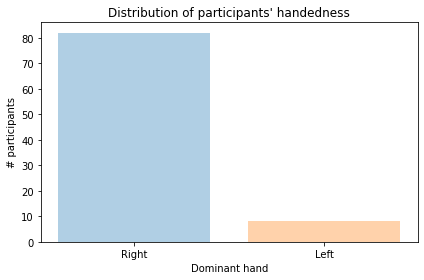

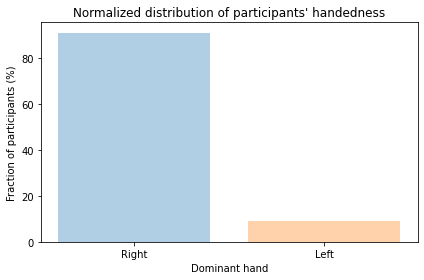

In [10]:
handedness = Counter(pre_df['D4'])
print_item_counts(handedness.items(), 'Dominant hand')

plt.figure()
plt.bar(handedness.keys(), handedness.values(), alpha=0.35, color=get_colors_list(len(handedness)))
plt.xlabel('Dominant hand')
plt.ylabel('# participants')
plt.title("Distribution of participants' handedness")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(handedness.keys(), np.array(list(handedness.values())) * 100 / 90, alpha=0.35, color=get_colors_list(len(handedness)))
plt.xlabel('Dominant hand')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' handedness")
plt.tight_layout()
plt.show()


## 1.4 Relationship to co-diners

Each of 90 participants assessed their relationship with their 2 co-diners => 180 one-directional assessments<br>
In fact, they might not mutually agree.

### 1.4.1 Relationship type

Relationship type:
	Friend: 155 (86.11%)
	Partner: 12 (6.67%)
	Professional (co-worker/classmate): 10 (5.56%)
	Other, please specify: 3 (1.67%)
		 Acquaintance
		 boyfriend
		 Acquaintance


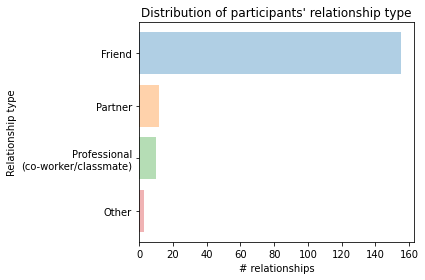

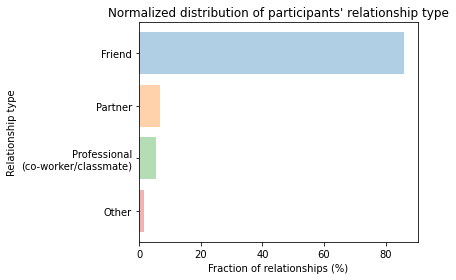

In [11]:
relationship_types = (Counter(pre_df['L1']) + Counter(pre_df['R1'])).most_common()[::-1]
print_item_counts(relationship_types[::-1], 'Relationship type')

for position in ['L', 'R']:
    for i, relationship in enumerate(pre_df[f'{position}1']):
        if relationship == 'Other, please specify':
            print(f"\t\t {pre_df[f'{position}1_4_TEXT'][i]}")

plt.figure()
plt.barh([f'{k.split(" ")[0]}\n{k.split(" ")[1]}' if len(k) > 22 else k.split(',')[0] for k, _ in relationship_types], [v for _, v in relationship_types], alpha=0.35, color=get_colors_list(len(relationship_types))[::-1])
plt.ylabel('Relationship type')
plt.xlabel('# relationships')
plt.title("Distribution of participants' relationship type")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh([f'{k.split(" ")[0]}\n{k.split(" ")[1]}' if len(k) > 22 else k.split(',')[0] for k, _ in relationship_types], 
         np.array([v for _, v in relationship_types]) * 100 / 180, alpha=0.35, color=get_colors_list(len(relationship_types))[::-1])
plt.ylabel('Relationship type')
plt.xlabel('Fraction of relationships (%)')
plt.title("Normalized distribution of participants' relationship type")
plt.tight_layout()
plt.show()


### 1.4.2 Relationship duration

Relationship duration:
	1 month - 1 year: 90 (50.00%)
	1 year - 2 years: 49 (27.22%)
	2 years - 5 years: 37 (20.56%)
	More than 5 years: 4 (2.22%)


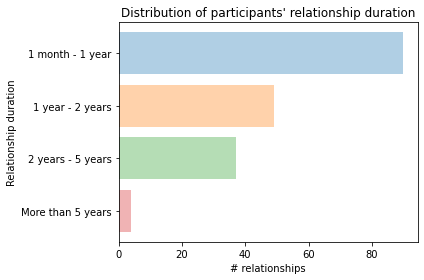

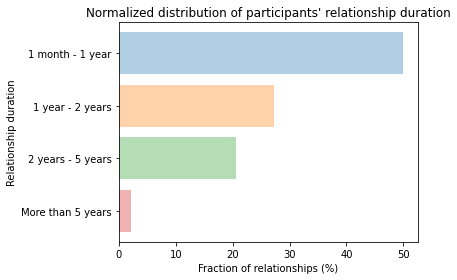

In [12]:
relationship_durations = Counter(pre_df['L2']) + Counter(pre_df['R2'])
relationship_durations = sorted(relationship_durations.items())
print_item_counts(relationship_durations, 'Relationship duration')

keys, values = zip(*relationship_durations[::-1])
plt.figure()
plt.barh(keys, values, alpha=0.35, color=get_colors_list(len(relationship_durations))[::-1])
plt.ylabel('Relationship duration')
plt.xlabel('# relationships')
plt.title("Distribution of participants' relationship duration")
plt.tight_layout()
plt.show()

keys, values = zip(*relationship_durations[::-1])
plt.figure()
plt.barh(keys, np.array(values) * 100 / 180, alpha=0.35, color=get_colors_list(len(relationship_durations))[::-1])
plt.ylabel('Relationship duration')
plt.xlabel('Fraction of relationships (%)')
plt.title("Normalized distribution of participants' relationship duration")
plt.tight_layout()
plt.show()


### 1.4.3 Frequency of eating together

Frequency of eating together:
	Several times a day: 9 (5.00%)
	Almost every day: 24 (13.33%)
	Few times a week: 39 (21.67%)
	Few times a month: 59 (32.78%)
	Few times a year: 41 (22.78%)
	Never
(this is the first time): 8 (4.44%)


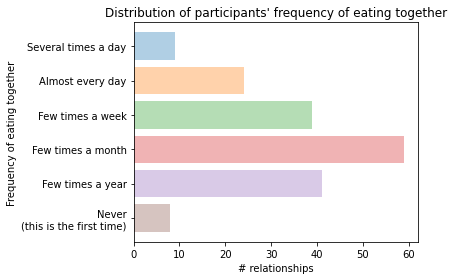

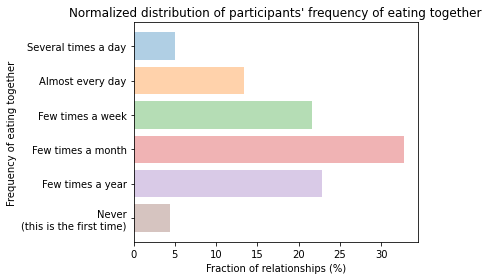

In [13]:
# Frequency of eating together (i.e. commensality frequency)
eating_together_freq = Counter(pre_df['L3']) + Counter(pre_df['R3'])
eating_together_freq = dict(sorted(eating_together_freq.items()))

# Shorten the longest key and impose key order
eating_together_freq['Never\n(this is the first time)'] = eating_together_freq['Never (this is the first time we are eating together)']
del eating_together_freq['Never (this is the first time we are eating together)']
eating_together_freq = { key : eating_together_freq[key] for key in ['Never\n(this is the first time)', 'Few times a year', 'Few times a month', 'Few times a week', 'Almost every day', 'Several times a day'] }
print_item_counts(list(eating_together_freq.items())[::-1], 'Frequency of eating together')

plt.figure()
plt.barh(list(eating_together_freq.keys()), eating_together_freq.values(), alpha=0.35, color=get_colors_list(len(eating_together_freq))[::-1])
plt.ylabel('Frequency of eating together')
plt.xlabel('# relationships')
plt.title("Distribution of participants' frequency of eating together")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh(list(eating_together_freq.keys()), np.array(list(eating_together_freq.values())) * 100 / 180, alpha=0.35, color=get_colors_list(len(eating_together_freq))[::-1])
plt.ylabel('Frequency of eating together')
plt.xlabel('Fraction of relationships (%)')
plt.title("Normalized distribution of participants' frequency of eating together")
plt.tight_layout()
plt.show()


## 1.5 Social dining habits

### 1.5.1 Co-diner type

Co-diner type:
Breakfast:
	Alone: 69 (76.67%)
	Random people: 1 (1.11%)
	Co-workers: 0 (0.00%)
	Friends/roommates: 9 (10.00%)
	Family: 1 (1.11%)
	Other: 10 (11.11%)
		 roommates, or I skip breakfast
		 partner
		 I don't really eat breakfast
		 I don't eat breakfast usually
		 dont eat breakfast
		 Don't eat breakfast
		 Skip breakfast
		 nan
		 Sleep in
		 don't eat
Lunch:
	Alone: 17 (18.89%)
	Random people: 3 (3.33%)
	Co-workers: 11 (12.22%)
	Friends/roommates: 58 (64.44%)
	Family: 1 (1.11%)
	Other: 0 (0.00%)
Dinner:
	Alone: 16 (17.78%)
	Random people: 0 (0.00%)
	Co-workers: 0 (0.00%)
	Friends/roommates: 72 (80.00%)
	Family: 1 (1.11%)
	Other: 1 (1.11%)
		 partner


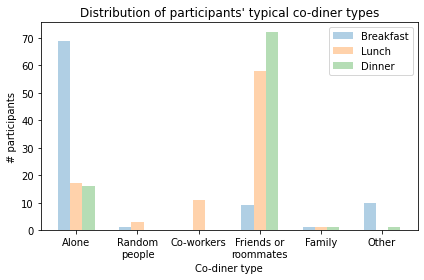

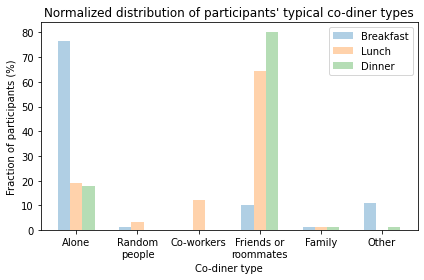

In [14]:
meal_types = ['Breakfast', 'Lunch', 'Dinner']
codiner_types = ['Alone', 'Random people', 'Co-workers', 'Friends/roommates', 'Family', 'Other, please specify']
codiner_types_labels = ['Alone', 'Random\npeople', 'Co-workers', 'Friends or\nroommates', 'Family', 'Other']
keys_range = np.arange(len(codiner_types))
ys = []
print('Co-diner type:')
plt.figure()
for i, meal_type in enumerate(meal_types):
    codiner_counter = Counter(pre_df[f'S1_{i + 1}'])
    # For the remaining types, impose key order and add zero counts
    codiner_counter_sorted = { codiner_type: 0 if codiner_type not in codiner_counter else codiner_counter[codiner_type] for codiner_type in codiner_types }
    # Rename the key for 'Other' co-diner types
    codiner_counter_sorted['Other'] = codiner_counter['Other, please specify']
    del codiner_counter_sorted['Other, please specify']
    print_item_counts(list(codiner_counter_sorted.items()), meal_type)

    # Show details of 'Other' co-diner types
    for j, codiner_type in enumerate(pre_df[f'S1_{i + 1}']):
        if codiner_type == 'Other, please specify':
            print(f"\t\t {pre_df[f'S1_{i + 1}_6_TEXT'][j]}")

    y = codiner_counter_sorted.values()
    ys.append(np.array(list(y)))
    plt.bar(keys_range + 0.2 * (i - 1), y, alpha=0.35, width=0.2, label=meal_type)
plt.xticks(keys_range, codiner_types_labels)
plt.xlabel('Co-diner type')
plt.ylabel('# participants')
plt.title("Distribution of participants' typical co-diner types")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
for i, meal_type in enumerate(meal_types):
    plt.bar(keys_range + 0.2 * (i - 1), ys[i] * 100 / 90, alpha=0.35, width=0.2, label=meal_type)
plt.xticks(keys_range, codiner_types_labels)
plt.xlabel('Co-diner type')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' typical co-diner types")
plt.legend()
plt.tight_layout()
plt.show()


### 1.5.2 Social dining frequency

Social dining frequency:
Breakfast:
 	 Min: 0 	 Max: 7 	 Mean: 1.3888888888888888 	 Std: 1.823881358498009 	 Median: 1.0
Lunch:
 	 Min: 0 	 Max: 7 	 Mean: 3.966666666666667 	 Std: 1.7916472867168918 	 Median: 4.0
Dinner:
 	 Min: 0 	 Max: 7 	 Mean: 4.477777777777778 	 Std: 1.9845390048392586 	 Median: 5.0


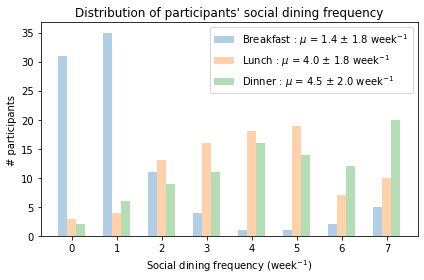

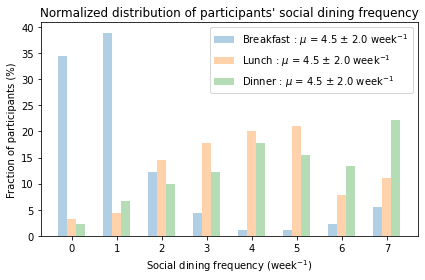

In [15]:
meal_types = ['Breakfast', 'Lunch', 'Dinner']
freq_range = np.arange(9)
print('Social dining frequency:')
ys = []
plt.figure()
for i, meal_type in enumerate(meal_types):
    sd_freq = pd.to_numeric(pre_df[f'S2_{i + 1}'])
    print_array_stats(sd_freq, meal_type)
    y = np.histogram(sd_freq, bins=freq_range)[0]
    ys.append(y)
    plt.bar(freq_range[:-1] + 0.2 * (i - 1), y, alpha=0.35, width=0.2, label=fr'{meal_type} : $\mu$ = {np.mean(sd_freq):.1f} $\pm$ {np.std(sd_freq):.1f} week$^{{-1}}$')
plt.legend()
plt.xlabel(fr'Social dining frequency (week$^{{-1}}$)')
plt.ylabel('# participants')
plt.title("Distribution of participants' social dining frequency")
plt.tight_layout()
plt.show()

plt.figure()
for i, meal_type in enumerate(meal_types):
    plt.bar(freq_range[:-1] + 0.2 * (i - 1), ys[i] * 100 / 90, alpha=0.35, width=0.2, label=fr'{meal_type} : $\mu$ = {np.mean(sd_freq):.1f} $\pm$ {np.std(sd_freq):.1f} week$^{{-1}}$')
plt.legend()
plt.xlabel(fr'Social dining frequency (week$^{{-1}}$)')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' social dining frequency")
plt.tight_layout()
plt.show()


### 1.5.3 Dining location

Dining location:
Breakfast:
	At home: 75 (83.33%)
	At restaurant: 2 (2.22%)
	At work: 3 (3.33%)
	Other: 10 (11.11%)
		 I don't eat breakfast
		 on campus
		 dining hall
		 While walking to class
		 i dont eat breakfast
		 don't eat breakfast
		 Dining Hall
		 nan
		 Sleep in
		 don't eat
Lunch:
	At home: 14 (15.56%)
	At restaurant: 14 (15.56%)
	At work: 38 (42.22%)
	Other: 24 (26.67%)
		 School
		 On campus
		 Campus
		 on campus
		 Campus Cafe
		 Dining hall
		 dining hall
		 Dining Hall
		 dining hall
		 Fairly uniform 3 way split
		 school
		 School
		 on Campus 
		 On campus
		 on campus
		 on campus
		 at school
		 School
		 school
		 Dining hall
		 Dining Hall
		 school
		 Dining Hall
		 dining hall
Dinner:
	At home: 60 (66.67%)
	At restaurant: 16 (17.78%)
	At work: 3 (3.33%)
	Other: 11 (12.22%)
		 friend house
		 Dining Hall, Campus
		 school cafeteria
		 Dining Hall
		 friends' place
		 dining hall
		 home/restaurant 60/30
		 Dining hall
		 Dining Hall
		 Dining Hall
		 dining 

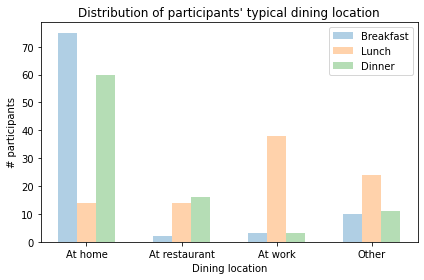

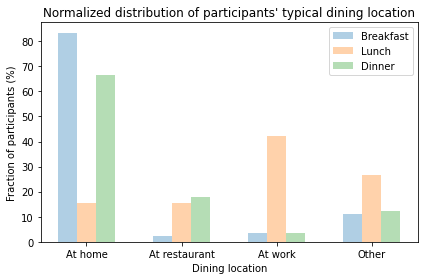

In [16]:
meal_types = ['Breakfast', 'Lunch', 'Dinner']
keys_range = np.arange(4)
locations = ['At home', 'At restaurant', 'At work', 'Other']
print('Dining location:')
ys = []
plt.figure()
for i, meal_type in enumerate(meal_types):
    dining_loc_counter = Counter(pre_df[f'S3_{i + 1}'])
    # Rename the key for 'Other' dining locations
    dining_loc_counter['Other'] = dining_loc_counter['Other, please specify']
    del dining_loc_counter['Other, please specify']
    dining_loc = sorted(dining_loc_counter.items())
    print_item_counts(dining_loc, meal_type)

    # Show details of 'Other' co-diner types
    for j, codiner_type in enumerate(pre_df[f'S3_{i + 1}']):
        if codiner_type == 'Other, please specify':
            print(f"\t\t {pre_df[f'S3_{i + 1}_4_TEXT'][j]}")

    y = [v for _, v in dining_loc]
    ys.append(np.array(y))
    plt.bar(keys_range + 0.2 * (i - 1), y, width=0.2, alpha=0.35, label=meal_type)
plt.xticks(keys_range, locations)
plt.xlabel('Dining location')
plt.ylabel('# participants')
plt.legend()
plt.title("Distribution of participants' typical dining location")
plt.tight_layout()
plt.show()

plt.figure()
for i, meal_type in enumerate(meal_types):
    plt.bar(keys_range + 0.2 * (i - 1), ys[i] * 100 / 90, width=0.2, alpha=0.35, label=meal_type)
plt.xticks(keys_range, locations)
plt.xlabel('Dining location')
plt.ylabel('Fraction of participants (%)')
plt.legend()
plt.title("Normalized distribution of participants' typical dining location")
plt.tight_layout()
plt.show()


# 2 Post-study questionnaire

## 2.1 Data validation

In [6]:
assert all(post_df['Progress'] == '100')
assert all(post_df['Finished'] == 'True')
for i in range(len(post_df) // 3):
    for j in range(3):
        # Session ID
        assert post_df['I1'][i * 3 + j] == f'{i + 1:02d}', f"{i}_{j}: {post_df['I1'][i * 3 + j]} != {i + 1:02d}"
        # Participant position
        assert post_df['I2'][i * 3 + j] == f'{j + 1:01d}', f"{i}_{j}: {post_df['I2'][i * 3 + j]} != {j + 1:01d}"


## 2.2 Dining experience

### 2.2.1 Ratings

Dining experience ratings:
My overall experience of the meal was great:
	1  Strongly disagree: 2 (2.22%)
	2  Disagree: 0 (0.00%)
	3  Somewhat disagree: 0 (0.00%)
	4  Neither agree or disagree: 2 (2.22%)
	5  Somewhat agree: 6 (6.67%)
	6  Agree: 22 (24.44%)
	7  Strongly agree: 58 (64.44%)


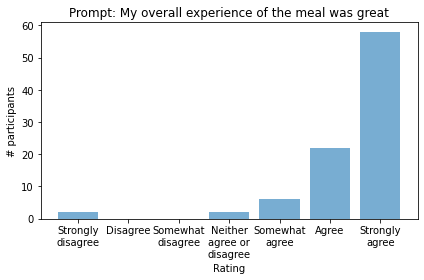

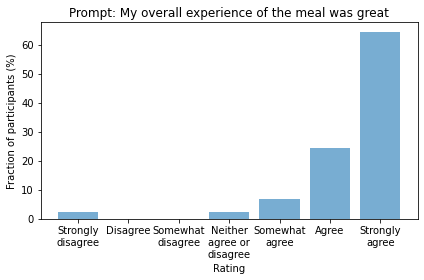

I liked the social interactions with the other participants very much:
	1  Strongly disagree: 2 (2.22%)
	2  Disagree: 0 (0.00%)
	3  Somewhat disagree: 0 (0.00%)
	4  Neither agree or disagree: 1 (1.11%)
	5  Somewhat agree: 3 (3.33%)
	6  Agree: 15 (16.67%)
	7  Strongly agree: 69 (76.67%)


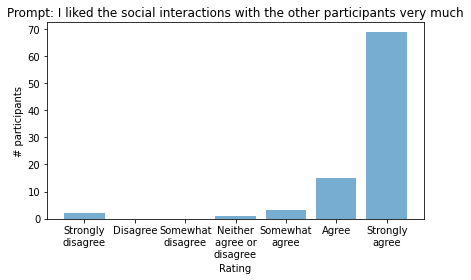

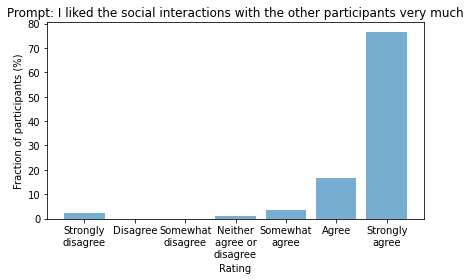

The food was excellent:
	1  Strongly disagree: 2 (2.22%)
	2  Disagree: 1 (1.11%)
	3  Somewhat disagree: 3 (3.33%)
	4  Neither agree or disagree: 6 (6.67%)
	5  Somewhat agree: 19 (21.11%)
	6  Agree: 25 (27.78%)
	7  Strongly agree: 34 (37.78%)


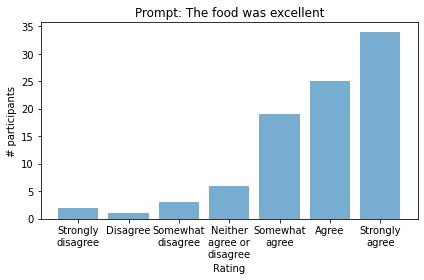

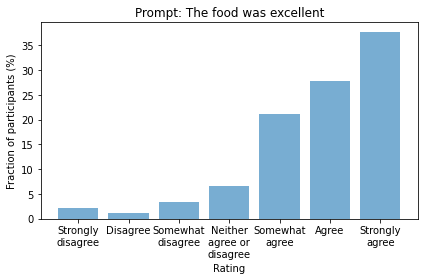

In [18]:
prompts = {
    'Q1_1': 'My overall experience of the meal was great',
    'Q1_2': 'I liked the social interactions with the other participants very much',
    'Q1_3': 'The food was excellent'
}
rating_labels = [
    '1  Strongly disagree',
    '2  Disagree',
    '3  Somewhat disagree',
    '4  Neither agree or disagree',
    '5  Somewhat agree',
    '6  Agree',
    '7  Strongly agree',
]
x_rating_labels = [
    'Strongly\ndisagree',
    'Disagree',
    'Somewhat\ndisagree',
    'Neither\nagree or\ndisagree',
    'Somewhat\nagree',
    'Agree',
    'Strongly\nagree',
]
print('Dining experience ratings:')
aggregated_counts = []
for prompt_key, prompt in prompts.items():
    ratings_counter = Counter(post_df[prompt_key])
    ratings_counter.update({ rating_label: 0 for rating_label in rating_labels if rating_label not in ratings_counter })
    ratings_sorted = sorted(ratings_counter.items())
    print_item_counts(ratings_sorted, prompt)

    y_counts = [cnt for _, cnt in ratings_sorted]
    aggregated_counts.append(y_counts)
    plt.figure()
    plt.bar(x_rating_labels, y_counts, alpha=0.6)
    plt.xlabel('Rating')
    plt.ylabel('# participants')
    plt.title(f'Prompt: {prompt}')
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.bar(x_rating_labels, np.array(y_counts) * 100 / 90, alpha=0.6)
    plt.xlabel('Rating')
    plt.ylabel('Fraction of participants (%)')
    plt.title(f'Prompt: {prompt}')
    plt.tight_layout()
    plt.show()


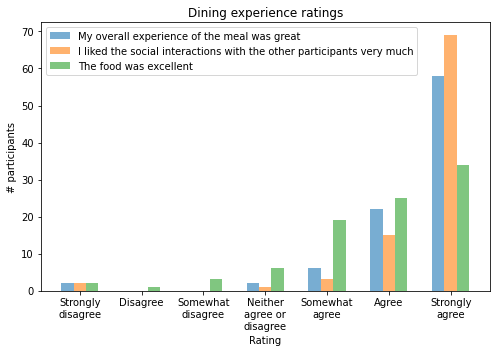

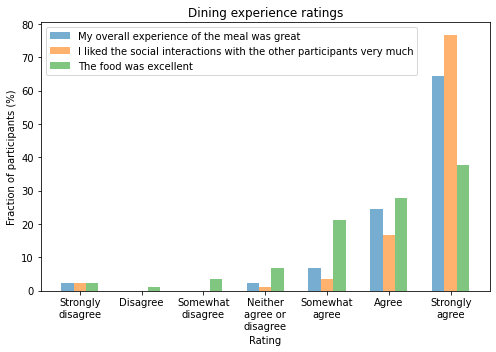

In [19]:
# All prompts in one plot
ratings_range = np.arange(1, 8)
plt.figure(figsize=(7,5))
for i, (prompt, y_counts) in enumerate(zip(prompts.values(), aggregated_counts)):
    plt.bar(ratings_range + 0.2 * (i - 1), y_counts, alpha=0.6, width=0.2, label=prompt)
plt.legend()
plt.xticks(ratings_range, x_rating_labels)
plt.xlabel('Rating')
plt.ylabel('# participants')
plt.title(f'Dining experience ratings')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
for i, (prompt, y_counts) in enumerate(zip(prompts.values(), aggregated_counts)):
    plt.bar(ratings_range + 0.2 * (i - 1), np.array(y_counts) * 100 / 90, alpha=0.6, width=0.2, label=prompt)
plt.legend()
plt.xticks(ratings_range, x_rating_labels)
plt.xlabel('Rating')
plt.ylabel('Fraction of participants (%)')
plt.title(f'Dining experience ratings')
plt.tight_layout()
plt.show()

### 2.2.2 Open-ended questions

In [7]:
open_questions = {
    'Q2': "Please list a few things that you liked about the meal experience you just had",
    'Q3': "Please list a few things that you didn't like about the meal experience you just had",
    'Q4': "When do you think it is appropriate to take a bite of food when you are eating with others? Please share your thoughts below."
}

for question_key, question in open_questions.items():
    print('=' * 150)
    print(question)
    print('=' * 150)
    responses_sorted = sorted([ (f'{session_id}_{participant_position}', response)  for session_id, participant_position, response in zip(post_df['I1'], post_df['I2'], post_df[question_key]) ])
    for participant_id, response in responses_sorted:
        print(f'{participant_id}\t| {response}')


Please list a few things that you liked about the meal experience you just had
01_1	| Hanging out with my friends over lunch.
01_2	| Talking about random things, getting to spend time with friends, eating leisurely
01_3	| The food and conversation
02_1	| The variety of conversation
02_2	| It was super interactive and I got to know my friends better
02_3	| The food, the conversation
03_1	| It was relaxing and a nice destress from all the assignments and deadlines around this time
03_2	| Talking with my friends, planning things...
03_3	| '- good friends, and I was hungry so I wanted to eat
04_1	| Got some time to pause and spend with friends
04_2	| talk with my colleges
04_3	| Variety of conversation topics 
05_1	| The food was delicious and I am good friends with the other participants so the conversation was good.
05_2	| Friends, food tasted so good
05_3	| '- the food was very good and the company was excellent.
06_1	| I liked getting the chance to catch up with my friends and socializ

# 3 Correlations

## 3.1 Between two relationship metrics

### 3.1.1 Co-diner relationship type vs. frequency of eating together

[[ 3.  6.  0.  0.]
 [20.  3.  0.  1.]
 [37.  0.  2.  0.]
 [50.  3.  4.  2.]
 [40.  0.  1.  0.]
 [ 5.  0.  3.  0.]]


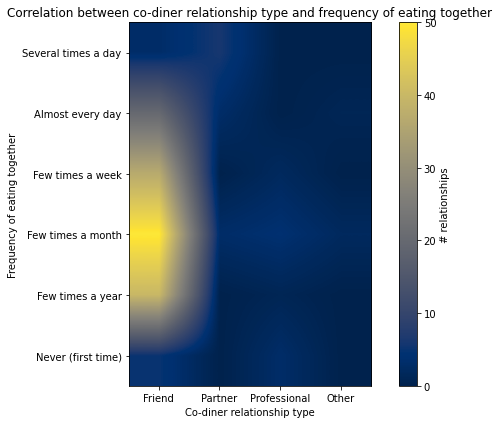

[[0.01935484 0.5        0.         0.        ]
 [0.12903226 0.25       0.         0.33333333]
 [0.23870968 0.         0.2        0.        ]
 [0.32258065 0.25       0.4        0.66666667]
 [0.25806452 0.         0.1        0.        ]
 [0.03225806 0.         0.3        0.        ]]


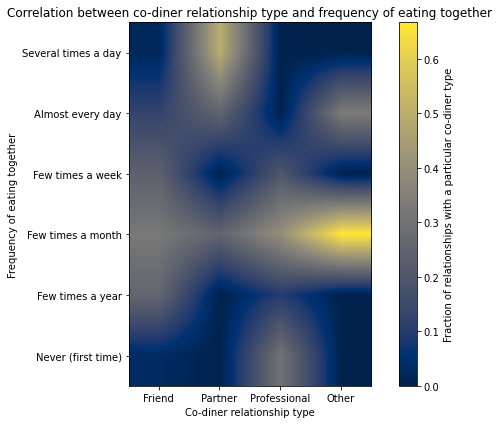

In [21]:
relationship_type_labels = {
    'Friend': 'Friend',
    'Partner': 'Partner',
    'Professional (co-worker/classmate)': 'Professional',
    'Other, please specify': 'Other'
}
eating_together_freq_labels = {
    'Several times a day': 'Several times a day',
    'Almost every day': 'Almost every day',
    'Few times a week': 'Few times a week',
    'Few times a month': 'Few times a month',
    'Few times a year': 'Few times a year',
    'Never (this is the first time we are eating together)': 'Never (first time)'
}
relationship_counts = np.zeros((len(eating_together_freq_labels), len(relationship_type_labels)))

for side in ['L', 'R']:
    for relationship_type_label, eating_together_freq_label in zip(pre_df[f'{side}1'], pre_df[f'{side}3']):

        idx_x = np.where(np.array(list(relationship_type_labels.keys())) == relationship_type_label)[0]
        idx_y = np.where(np.array(list(eating_together_freq_labels.keys())) == eating_together_freq_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Frequency of eating together')
plt.title('Correlation between co-diner relationship type and frequency of eating together')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular co-diner type
relationship_counts = relationship_counts / np.sum(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular co-diner type', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Frequency of eating together')
plt.title('Correlation between co-diner relationship type and frequency of eating together')
plt.tight_layout()
plt.show()


### 3.1.2 Co-diner relationship duration vs. frequency of eating together

[[ 2.  3.  2.  2.]
 [ 9.  6.  8.  1.]
 [20. 13.  5.  1.]
 [32. 13. 14.  0.]
 [21. 14.  6.  0.]
 [ 6.  0.  2.  0.]]


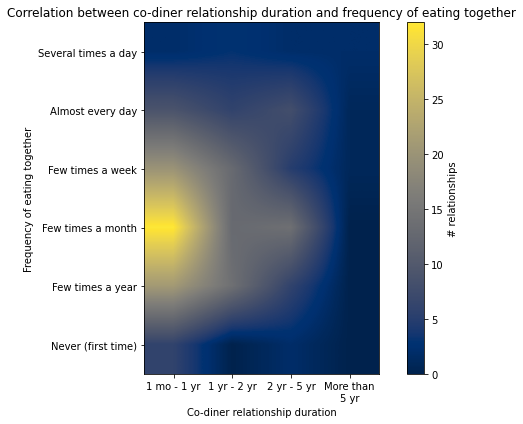

[[0.0625     0.21428571 0.14285714 1.        ]
 [0.28125    0.42857143 0.57142857 0.5       ]
 [0.625      0.92857143 0.35714286 0.5       ]
 [1.         0.92857143 1.         0.        ]
 [0.65625    1.         0.42857143 0.        ]
 [0.1875     0.         0.14285714 0.        ]]


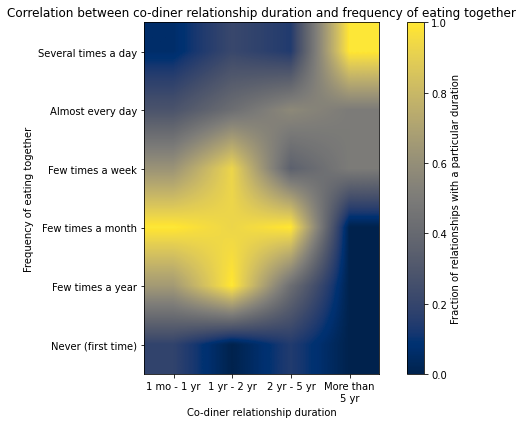

In [24]:
relationship_duration_labels = {
	'1 month - 1 year': '1 mo - 1 yr',
	'1 year - 2 years': '1 yr - 2 yr',
	'2 years - 5 years': '2 yr - 5 yr',
	'More than 5 years': 'More than\n5 yr'
}
eating_together_freq_labels = {
    'Several times a day': 'Several times a day',
    'Almost every day': 'Almost every day',
    'Few times a week': 'Few times a week',
    'Few times a month': 'Few times a month',
    'Few times a year': 'Few times a year',
    'Never (this is the first time we are eating together)': 'Never (first time)'
}
relationship_counts = np.zeros((len(eating_together_freq_labels), len(relationship_duration_labels)))

for side in ['L', 'R']:
    for relationship_duration_label, eating_together_freq_label in zip(pre_df[f'{side}2'], pre_df[f'{side}3']):

        idx_x = np.where(np.array(list(relationship_duration_labels.keys())) == relationship_duration_label)[0]
        idx_y = np.where(np.array(list(eating_together_freq_labels.keys())) == eating_together_freq_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.yticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.xlabel('Co-diner relationship duration')
plt.ylabel(f'Frequency of eating together')
plt.title('Correlation between co-diner relationship duration and frequency of eating together')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular duration
relationship_counts = relationship_counts / np.max(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular duration', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.yticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.xlabel('Co-diner relationship duration')
plt.ylabel(f'Frequency of eating together')
plt.title('Correlation between co-diner relationship duration and frequency of eating together')
plt.tight_layout()
plt.show()


### 3.1.3 Co-diner relationship type vs. relationship duration

[[76.  4.  9.  1.]
 [41.  6.  0.  2.]
 [36.  0.  1.  0.]
 [ 2.  2.  0.  0.]]


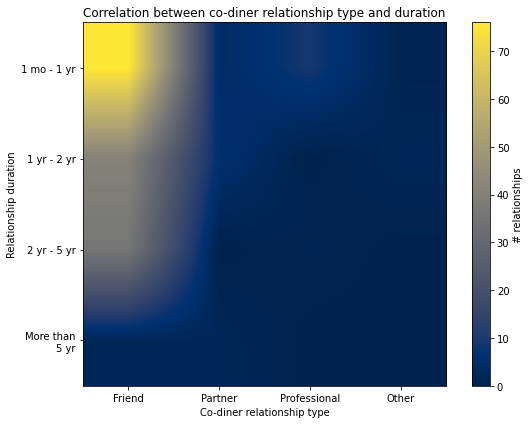

[[0.49032258 0.33333333 0.9        0.33333333]
 [0.26451613 0.5        0.         0.66666667]
 [0.23225806 0.         0.1        0.        ]
 [0.01290323 0.16666667 0.         0.        ]]


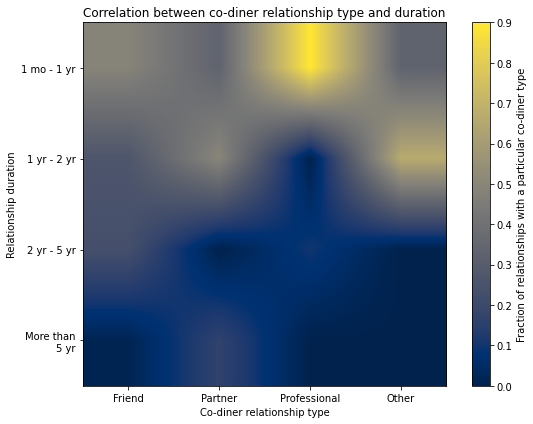

In [25]:
relationship_type_labels = {
    'Friend': 'Friend',
    'Partner': 'Partner',
    'Professional (co-worker/classmate)': 'Professional',
    'Other, please specify': 'Other'
}
relationship_duration_labels = {
	'1 month - 1 year': '1 mo - 1 yr',
	'1 year - 2 years': '1 yr - 2 yr',
	'2 years - 5 years': '2 yr - 5 yr',
	'More than 5 years': 'More than\n5 yr'
}
relationship_counts = np.zeros((len(relationship_duration_labels), len(relationship_type_labels)))

for side in ['L', 'R']:
    for relationship_type_label, relationship_duration_label in zip(pre_df[f'{side}1'], pre_df[f'{side}2']):

        idx_x = np.where(np.array(list(relationship_type_labels.keys())) == relationship_type_label)[0]
        idx_y = np.where(np.array(list(relationship_duration_labels.keys())) == relationship_duration_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Relationship duration')
plt.title('Correlation between co-diner relationship type and duration')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular co-diner type
relationship_counts = relationship_counts / np.sum(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular co-diner type', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Relationship duration')
plt.title('Correlation between co-diner relationship type and duration')
plt.tight_layout()
plt.show()


## 3.2 Between two rating metrics

### 3.2.1 Food rating vs. social interaction rating

[[ 2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.]
 [ 0.  0.  1.  3.  6.  5.  0.]
 [ 0.  0.  2.  3. 12. 19. 33.]]


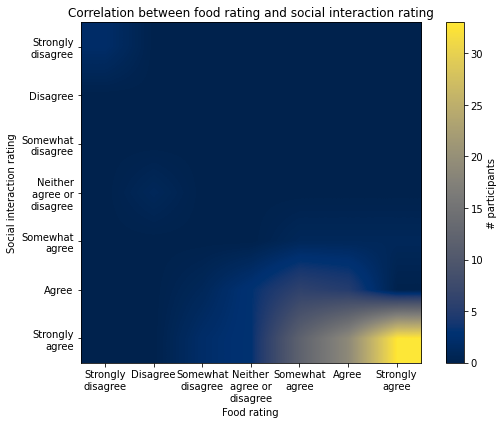

[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.05263158 0.04
  0.02941176]
 [0.         0.         0.33333333 0.5        0.31578947 0.2
  0.        ]
 [0.         0.         0.66666667 0.5        0.63157895 0.76
  0.97058824]]


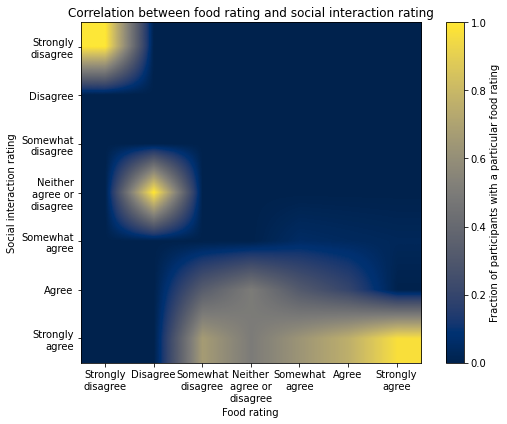

In [26]:
prompts = {
    'Q1_1': 'My overall experience of the meal was great',
    'Q1_2': 'I liked the social interactions with the other participants very much',
    'Q1_3': 'The food was excellent'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
participant_counts = np.zeros((len(rating_labels), len(rating_labels)))

for food_rating_label, social_interaction_rating_label in zip(post_df['Q1_3'], post_df['Q1_2']):

    idx_x = np.where(np.array(list(rating_labels.keys())) == food_rating_label)[0]
    idx_y = np.where(np.array(list(rating_labels.keys())) == social_interaction_rating_label)[0]
    participant_counts[idx_y, idx_x] += 1

print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# participants', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Food rating')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between food rating and social interaction rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of participants with a particular food rating
participant_counts = participant_counts / np.sum(participant_counts, axis=0)
print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of participants with a particular food rating', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Food rating')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between food rating and social interaction rating')
plt.tight_layout()
plt.show()


### 3.2.2 Food rating vs. overall experience rating

[[ 2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  3.  1.  1.]
 [ 0.  0.  2.  2.  6. 10.  2.]
 [ 0.  0.  0.  3. 10. 14. 31.]]


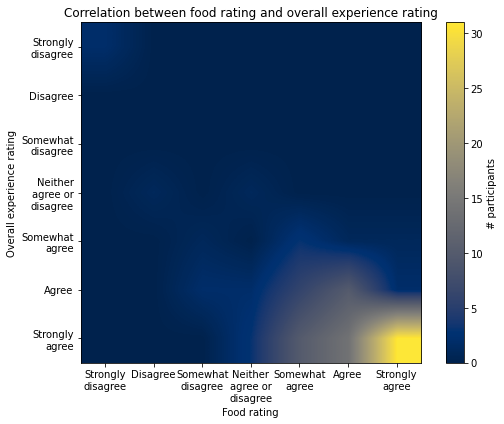

[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.16666667 0.         0.
  0.        ]
 [0.         0.         0.33333333 0.         0.15789474 0.04
  0.02941176]
 [0.         0.         0.66666667 0.33333333 0.31578947 0.4
  0.05882353]
 [0.         0.         0.         0.5        0.52631579 0.56
  0.91176471]]


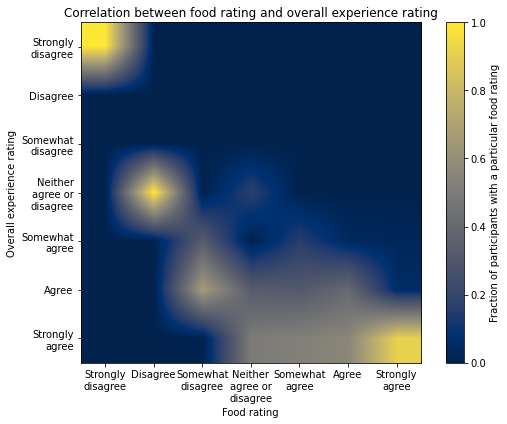

In [27]:
prompts = {
    'Q1_1': 'My overall experience of the meal was great',
    'Q1_2': 'I liked the social interactions with the other participants very much',
    'Q1_3': 'The food was excellent'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
participant_counts = np.zeros((len(rating_labels), len(rating_labels)))

for food_rating_label, overall_experience_rating_label in zip(post_df['Q1_3'], post_df['Q1_1']):

    idx_x = np.where(np.array(list(rating_labels.keys())) == food_rating_label)[0]
    idx_y = np.where(np.array(list(rating_labels.keys())) == overall_experience_rating_label)[0]
    participant_counts[idx_y, idx_x] += 1

print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# participants', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Food rating')
plt.ylabel(f'Overall experience rating')
plt.title('Correlation between food rating and overall experience rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of participants with a particular food rating
participant_counts = participant_counts / np.sum(participant_counts, axis=0)
print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of participants with a particular food rating', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Food rating')
plt.ylabel(f'Overall experience rating')
plt.title('Correlation between food rating and overall experience rating')
plt.tight_layout()
plt.show()


### 3.2.3 Social interaction vs. overall experience rating

[[ 2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  2.  3.  1.]
 [ 0.  0.  0.  0.  1. 11. 10.]
 [ 0.  0.  0.  0.  0.  0. 58.]]


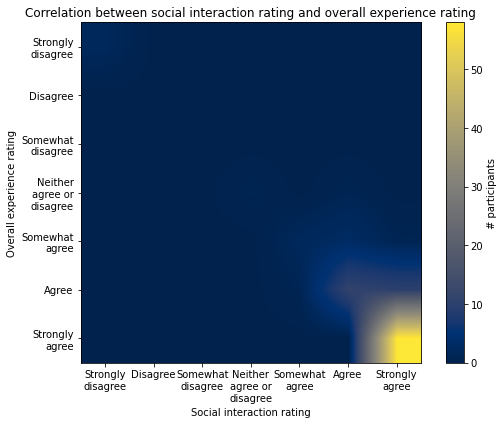

/tmp/ipykernel_237269/566224304.py:40: RuntimeWarning: invalid value encountered in true_divide
  participant_counts = np.nan_to_num( participant_counts / np.sum(participant_counts, axis=0) )


[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         1.         0.         0.06666667
  0.        ]
 [0.         0.         0.         0.         0.66666667 0.2
  0.01449275]
 [0.         0.         0.         0.         0.33333333 0.73333333
  0.14492754]
 [0.         0.         0.         0.         0.         0.
  0.84057971]]


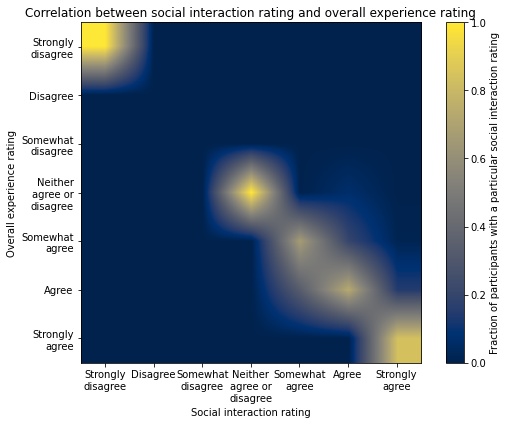

In [28]:
prompts = {
    'Q1_1': 'My overall experience of the meal was great',
    'Q1_2': 'I liked the social interactions with the other participants very much',
    'Q1_3': 'The food was excellent'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
participant_counts = np.zeros((len(rating_labels), len(rating_labels)))

for social_interaction_rating_label, overall_experience_rating_label in zip(post_df['Q1_2'], post_df['Q1_1']):

    idx_x = np.where(np.array(list(rating_labels.keys())) == social_interaction_rating_label)[0]
    idx_y = np.where(np.array(list(rating_labels.keys())) == overall_experience_rating_label)[0]
    participant_counts[idx_y, idx_x] += 1

print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# participants', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel(f'Social interaction rating')
plt.ylabel(f'Overall experience rating')
plt.title('Correlation between social interaction rating and overall experience rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of participants with a particular social interaction rating
participant_counts = np.nan_to_num( participant_counts / np.sum(participant_counts, axis=0) )
print(participant_counts)
plt.figure(figsize=(8, 6))
plt.imshow(participant_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of participants with a particular social interaction rating', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel(f'Social interaction rating')
plt.ylabel(f'Overall experience rating')
plt.title('Correlation between social interaction rating and overall experience rating')
plt.tight_layout()
plt.show()


## 3.3 Between a relationship metric and a rating metric

### 3.3.1 Co-diner relationship type vs. social interaction rating

[[  4.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  1.   1.   0.   0.]
 [  6.   0.   0.   0.]
 [ 26.   3.   0.   1.]
 [118.   8.  10.   2.]]


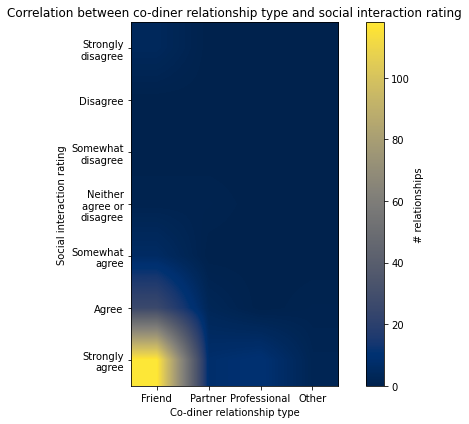

[[0.02580645 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.00645161 0.08333333 0.         0.        ]
 [0.03870968 0.         0.         0.        ]
 [0.16774194 0.25       0.         0.33333333]
 [0.76129032 0.66666667 1.         0.66666667]]


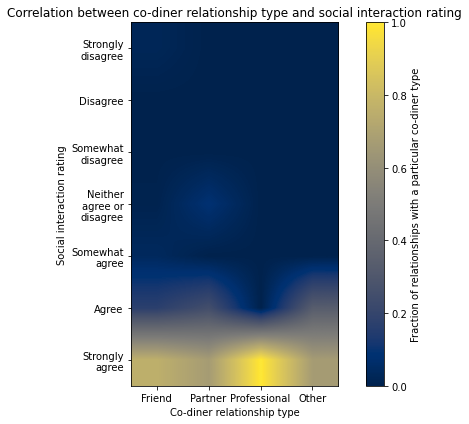

In [29]:
relationship_type_labels = {
    'Friend': 'Friend',
    'Partner': 'Partner',
    'Professional (co-worker/classmate)': 'Professional',
    'Other, please specify': 'Other'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
relationship_counts = np.zeros((len(rating_labels), len(relationship_type_labels)))

for side in ['L', 'R']:
    for relationship_type_label, rating_label in zip(pre_df[f'{side}1'], post_df['Q1_2']):

        idx_x = np.where(np.array(list(relationship_type_labels.keys())) == relationship_type_label)[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between co-diner relationship type and social interaction rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular co-diner type
relationship_counts = relationship_counts / np.sum(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular co-diner type', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_type_labels.values())), relationship_type_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Co-diner relationship type')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between co-diner relationship type and social interaction rating')
plt.tight_layout()
plt.show()


### 3.3.2 Co-diner relationship duration vs. social interaction rating

[[ 2.  2.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 1.  1.  0.  0.]
 [ 5.  1.  0.  0.]
 [16.  8.  5.  1.]
 [66. 37. 32.  3.]]


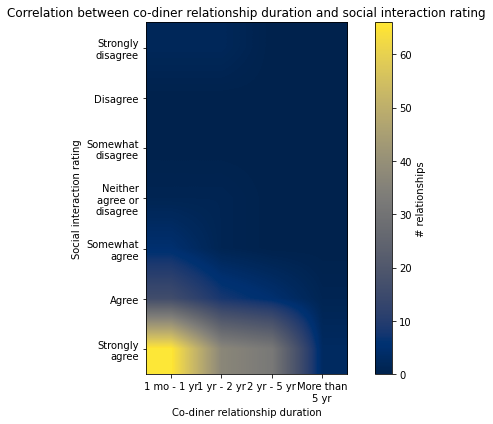

[[0.02222222 0.04081633 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.01111111 0.02040816 0.         0.        ]
 [0.05555556 0.02040816 0.         0.        ]
 [0.17777778 0.16326531 0.13513514 0.25      ]
 [0.73333333 0.75510204 0.86486486 0.75      ]]


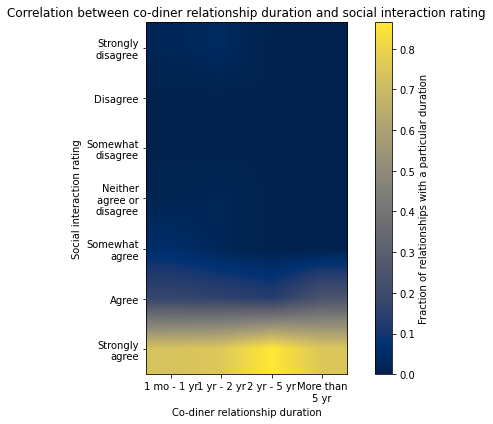

In [30]:
relationship_duration_labels = {
	'1 month - 1 year': '1 mo - 1 yr',
	'1 year - 2 years': '1 yr - 2 yr',
	'2 years - 5 years': '2 yr - 5 yr',
	'More than 5 years': 'More than\n5 yr'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
relationship_counts = np.zeros((len(rating_labels), len(relationship_duration_labels)))

for side in ['L', 'R']:
    for relationship_duration_label, rating_label in zip(pre_df[f'{side}2'], post_df['Q1_2']):

        idx_x = np.where(np.array(list(relationship_duration_labels.keys())) == relationship_duration_label)[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Co-diner relationship duration')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between co-diner relationship duration and social interaction rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular duration
relationship_counts = relationship_counts / np.sum(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 6))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular duration', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(relationship_duration_labels.values())), relationship_duration_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Co-diner relationship duration')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between co-diner relationship duration and social interaction rating')
plt.tight_layout()
plt.show()


### 3.3.3 Frequency of eating together vs. social interaction rating

[[ 0.  0.  1.  0.  2.  1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.]
 [ 0.  3.  3.  0.  0.  0.]
 [ 1.  4.  7. 11.  7.  0.]
 [ 8. 17. 28. 47. 31.  7.]]


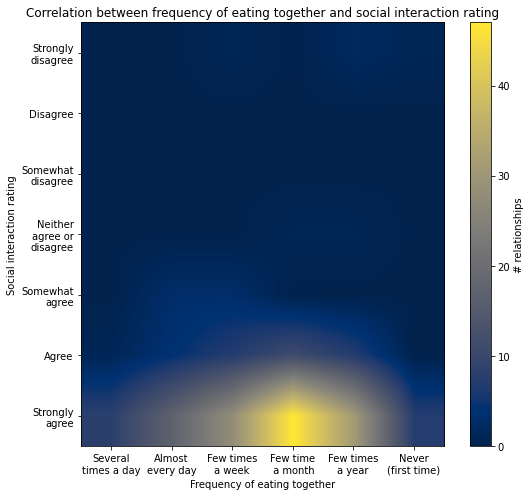

[[0.         0.         0.02564103 0.         0.04878049 0.125     ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.01694915 0.02439024 0.        ]
 [0.         0.125      0.07692308 0.         0.         0.        ]
 [0.11111111 0.16666667 0.17948718 0.18644068 0.17073171 0.        ]
 [0.88888889 0.70833333 0.71794872 0.79661017 0.75609756 0.875     ]]


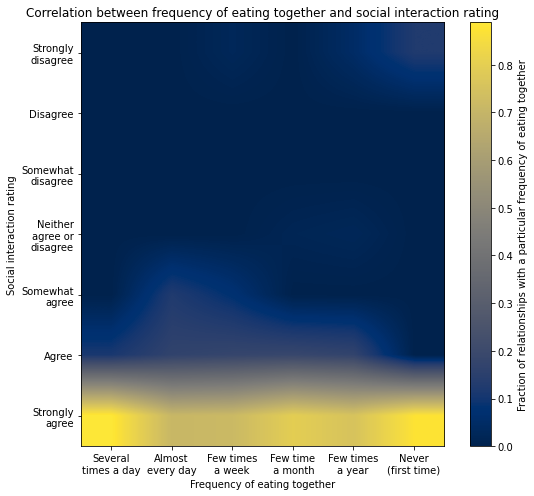

In [31]:
eating_together_freq_labels = {
    'Several times a day': 'Several\ntimes a day',
    'Almost every day': 'Almost\nevery day',
    'Few times a week': 'Few times\na week',
    'Few times a month': 'Few time\n a month',
    'Few times a year': 'Few times\na year',
    'Never (this is the first time we are eating together)': 'Never\n(first time)'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}
relationship_counts = np.zeros((len(rating_labels), len(eating_together_freq_labels)))

for side in ['L', 'R']:
    for eating_together_freq_label, rating_label in zip(pre_df[f'{side}3'], post_df['Q1_2']):

        idx_x = np.where(np.array(list(eating_together_freq_labels.keys())) == eating_together_freq_label)[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        relationship_counts[idx_y, idx_x] += 1

print(relationship_counts)
plt.figure(figsize=(8, 7))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='# relationships', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Frequency of eating together')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between frequency of eating together and social interaction rating')
plt.tight_layout()
plt.show()

# Normalize by the total number of relationships with a particular frequency of eating together
relationship_counts = relationship_counts / np.sum(relationship_counts, axis=0)
print(relationship_counts)
plt.figure(figsize=(8, 7))
plt.imshow(relationship_counts, cmap='cividis', origin='upper', 
    interpolation='bilinear'
)
plt.colorbar(label='Fraction of relationships with a particular frequency of eating together', 
    # orientation='horizontal', location='top'
)
plt.xticks(np.arange(len(eating_together_freq_labels.values())), eating_together_freq_labels.values())
plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
plt.xlabel('Frequency of eating together')
plt.ylabel(f'Social interaction rating')
plt.title('Correlation between frequency of eating together and social interaction rating')
plt.tight_layout()
plt.show()


## 3.4 Between a social dining habit metric and a rating metric

### 3.4.1 Typical co-diner type vs. social interaction rating

Breakfast
[[ 2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.  1.]
 [12.  0.  0.  2.  0.  1.]
 [52.  1.  0.  7.  1.  8.]]


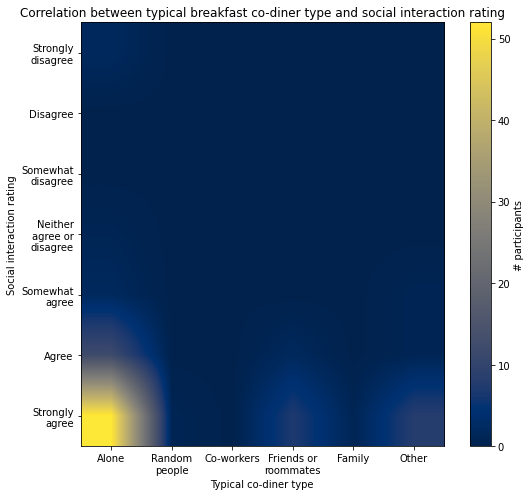

[[0.02898551 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.01449275 0.         0.         0.         0.         0.        ]
 [0.02898551 0.         0.         0.         0.         0.1       ]
 [0.17391304 0.         0.         0.22222222 0.         0.1       ]
 [0.75362319 1.         0.         0.77777778 1.         0.8       ]]


/tmp/ipykernel_237269/1449074772.py:46: RuntimeWarning: invalid value encountered in true_divide
  participant_count = np.nan_to_num( participant_count / np.sum(participant_count, axis=0) )


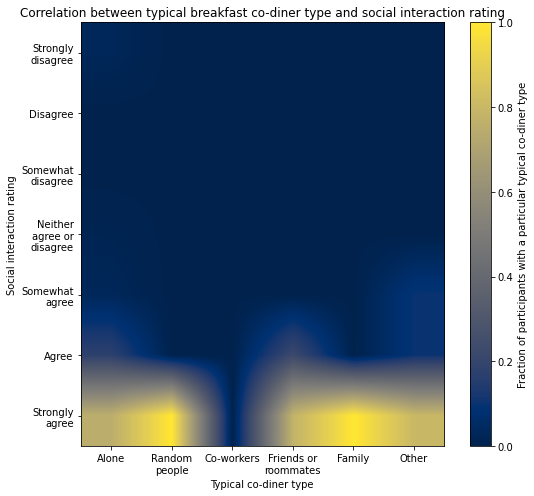

Lunch
[[ 1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  2.  0.  0.]
 [ 2.  1.  2. 10.  0.  0.]
 [13.  1.  9. 45.  1.  0.]]


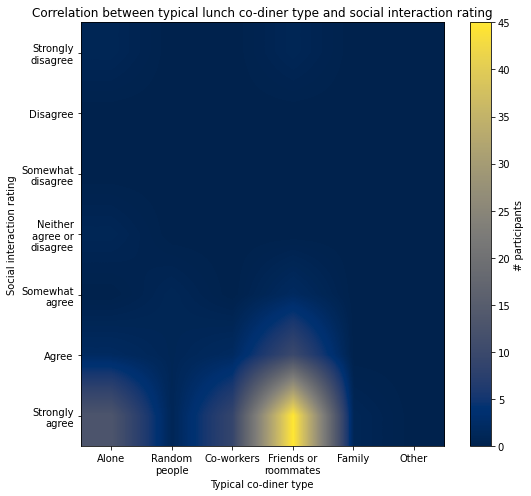

[[0.05882353 0.         0.         0.01724138 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.05882353 0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.03448276 0.         0.        ]
 [0.11764706 0.33333333 0.18181818 0.17241379 0.         0.        ]
 [0.76470588 0.33333333 0.81818182 0.77586207 1.         0.        ]]


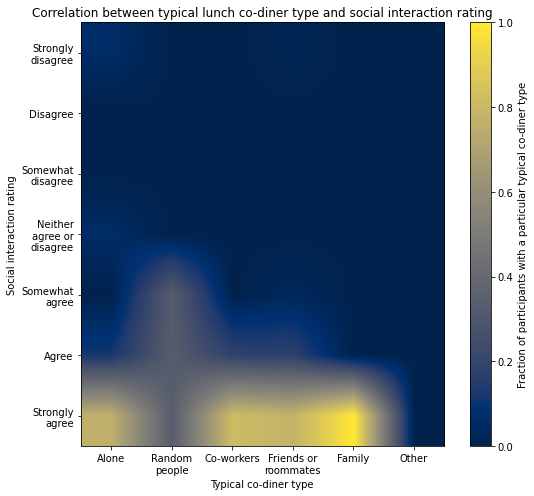

Dinner
[[ 1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  2.  1.  0.]
 [ 2.  0.  0. 13.  0.  0.]
 [13.  0.  0. 55.  0.  1.]]


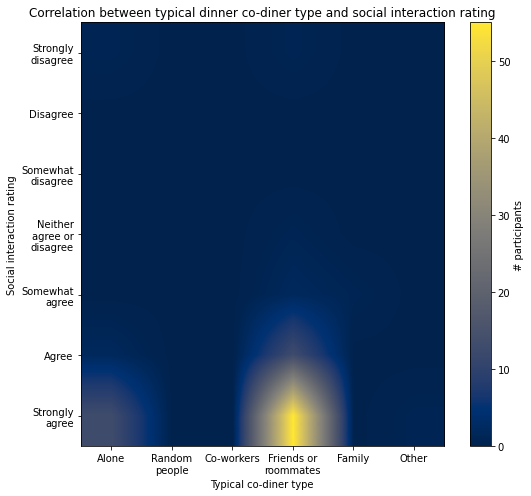

[[0.0625     0.         0.         0.01388889 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.01388889 0.         0.        ]
 [0.         0.         0.         0.02777778 1.         0.        ]
 [0.125      0.         0.         0.18055556 0.         0.        ]
 [0.8125     0.         0.         0.76388889 0.         1.        ]]


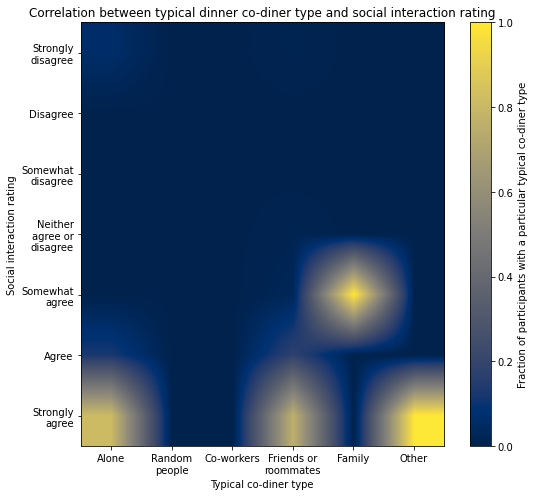

In [32]:
codiner_type_labels = {
    'Alone': 'Alone', 
    'Random people': 'Random\npeople', 
    'Co-workers': 'Co-workers', 
    'Friends/roommates': 'Friends or\nroommates', 
    'Family': 'Family', 
    'Other, please specify': 'Other'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}

for i, meal_type in enumerate(['Breakfast', 'Lunch', 'Dinner']):
    participant_count = np.zeros((len(rating_labels), len(codiner_type_labels)))
    print('=' * 120)
    print(meal_type)
    for codiner_type_label, rating_label in zip(pre_df[f'S1_{i + 1}'], post_df['Q1_2']):

        idx_x = np.where(np.array(list(codiner_type_labels.keys())) == codiner_type_label)[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        participant_count[idx_y, idx_x] += 1

    print(participant_count)
    plt.figure(figsize=(8, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='# participants', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(np.arange(len(codiner_type_labels.values())), codiner_type_labels.values())
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical co-diner type')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} co-diner type and social interaction rating')
    plt.tight_layout()
    plt.show()

    # Normalize by the total number of participants with a particular typical co-diner type
    participant_count = np.nan_to_num( participant_count / np.sum(participant_count, axis=0) )
    print(participant_count)
    plt.figure(figsize=(8, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='Fraction of participants with a particular typical co-diner type', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(np.arange(len(codiner_type_labels.values())), codiner_type_labels.values())
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical co-diner type')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} co-diner type and social interaction rating')
    plt.tight_layout()
    plt.show()


### 3.4.2 Typical social dining frequency vs. social interaction rating

Breakfast
[[ 1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  1.  0.  0.  0.  0.]
 [ 6.  6.  1.  1.  0.  0.  0.  1.]
 [22. 27. 10.  2.  1.  1.  2.  4.]]


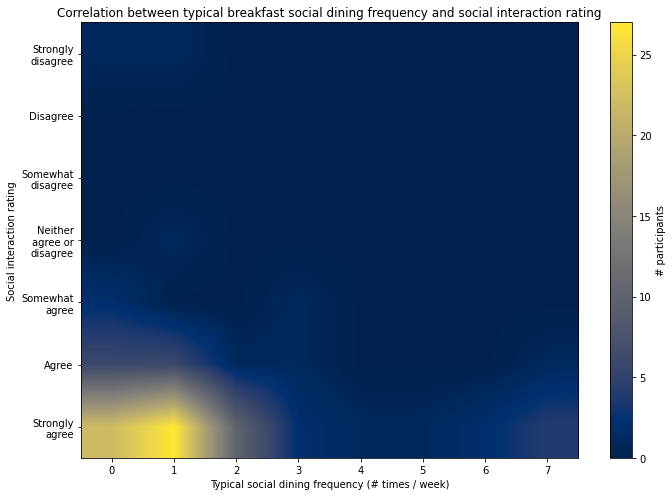

[[0.03225806 0.02857143 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.02857143 0.         0.         0.         0.
  0.         0.        ]
 [0.06451613 0.         0.         0.25       0.         0.
  0.         0.        ]
 [0.19354839 0.17142857 0.09090909 0.25       0.         0.
  0.         0.2       ]
 [0.70967742 0.77142857 0.90909091 0.5        1.         1.
  1.         0.8       ]]


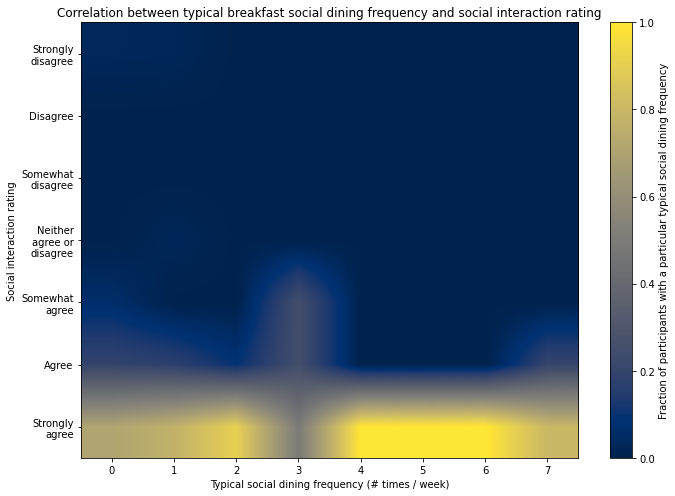

Lunch
[[ 0.  0.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  3.  4.  3.  4.  0.  1.]
 [ 3.  4.  8. 11. 13. 14.  7.  9.]]


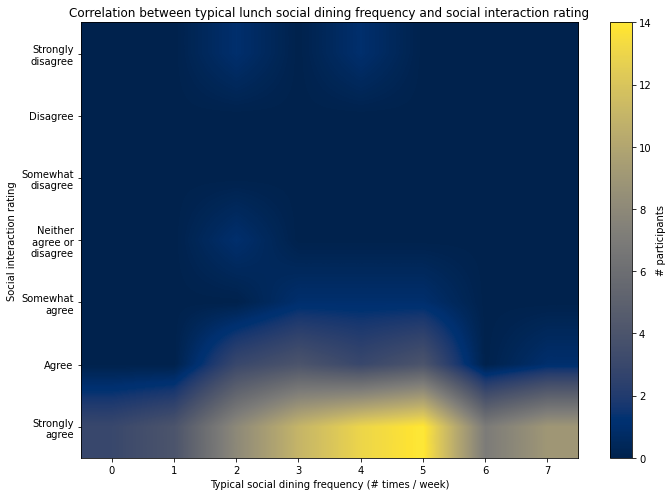

[[0.         0.         0.07692308 0.         0.05555556 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.07692308 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.0625     0.05555556 0.05263158
  0.         0.        ]
 [0.         0.         0.23076923 0.25       0.16666667 0.21052632
  0.         0.1       ]
 [1.         1.         0.61538462 0.6875     0.72222222 0.73684211
  1.         0.9       ]]


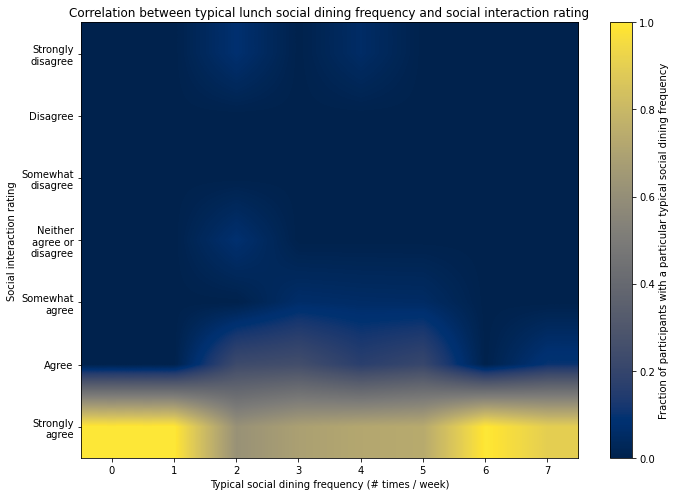

Dinner
[[ 0.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  2.  0.]
 [ 1.  0.  1.  4.  3.  2.  2.  2.]
 [ 1.  6.  7.  7. 12. 11.  7. 18.]]


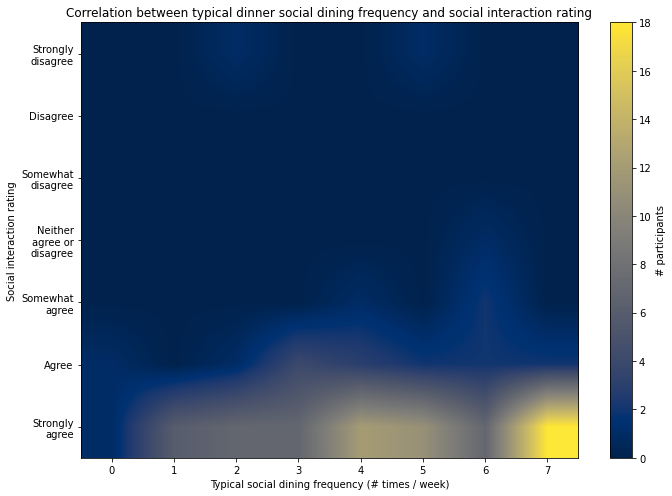

[[0.         0.         0.11111111 0.         0.         0.07142857
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.08333333 0.        ]
 [0.         0.         0.         0.         0.0625     0.
  0.16666667 0.        ]
 [0.5        0.         0.11111111 0.36363636 0.1875     0.14285714
  0.16666667 0.1       ]
 [0.5        1.         0.77777778 0.63636364 0.75       0.78571429
  0.58333333 0.9       ]]


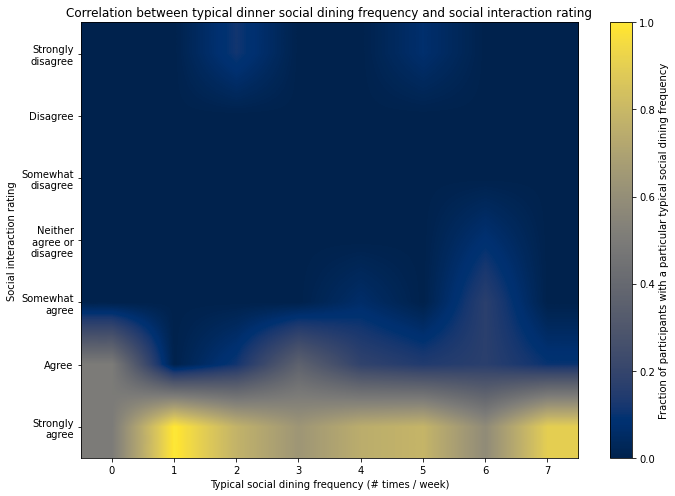

In [33]:
dining_freq_range = np.arange(8)
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}

for i, meal_type in enumerate(['Breakfast', 'Lunch', 'Dinner']):
    participant_count = np.zeros((len(rating_labels), len(dining_freq_range)))
    print('=' * 120)
    print(meal_type)
    for dining_freq, rating_label in zip(pre_df[f'S2_{i + 1}'], post_df['Q1_2']):
        idx_x = np.where(dining_freq_range == np.int64(dining_freq))[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        participant_count[idx_y, idx_x] += 1

    print(participant_count)
    plt.figure(figsize=(10, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='# participants', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(dining_freq_range, dining_freq_range)
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical social dining frequency (# times / week)')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} social dining frequency and social interaction rating')
    plt.tight_layout()
    plt.show()

    # Normalize by the total number of participants with a particular typical social dining frequency
    participant_count = np.nan_to_num( participant_count / np.sum(participant_count, axis=0) )
    print(participant_count)
    plt.figure(figsize=(10, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='Fraction of participants with a particular typical social dining frequency', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(dining_freq_range, dining_freq_range)
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical social dining frequency (# times / week)')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} social dining frequency and social interaction rating')
    plt.tight_layout()
    plt.show()


### 3.4.3 Typical dining location vs. social interaction rating

Breakfast
[[ 2.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 2.  0.  0.  1.]
 [12.  0.  1.  2.]
 [59.  2.  2.  6.]]


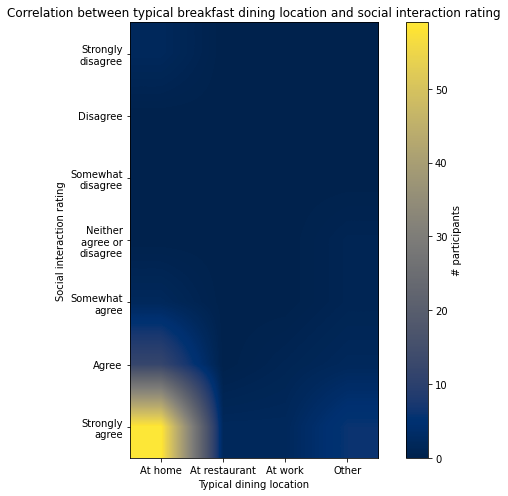

[[0.02666667 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.1       ]
 [0.02666667 0.         0.         0.1       ]
 [0.16       0.         0.33333333 0.2       ]
 [0.78666667 1.         0.66666667 0.6       ]]


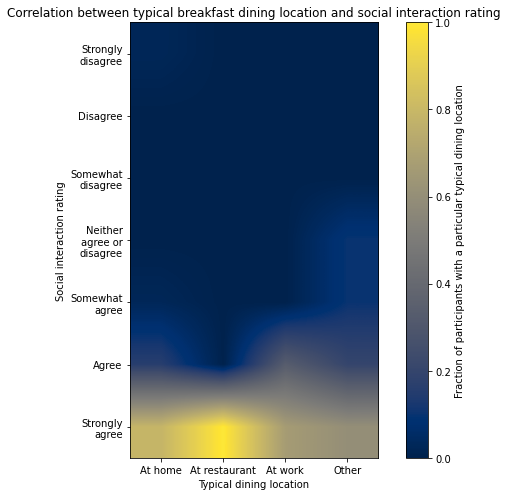

Lunch
[[ 1.  0.  1.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  2.]
 [ 3.  3.  5.  4.]
 [ 9. 10. 32. 18.]]


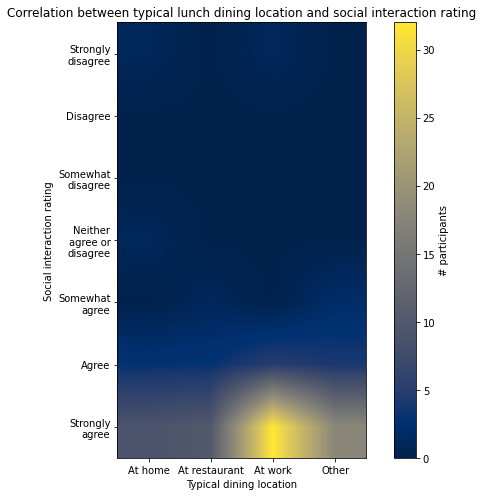

[[0.07142857 0.         0.02631579 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.07142857 0.         0.         0.        ]
 [0.         0.07142857 0.         0.08333333]
 [0.21428571 0.21428571 0.13157895 0.16666667]
 [0.64285714 0.71428571 0.84210526 0.75      ]]


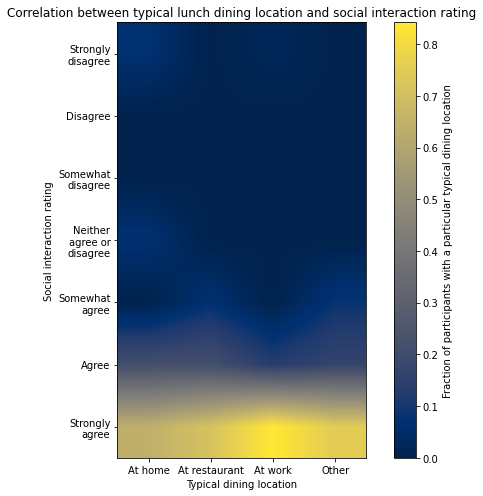

Dinner
[[ 2.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 2.  0.  1.  0.]
 [10.  2.  2.  1.]
 [45. 14.  0. 10.]]


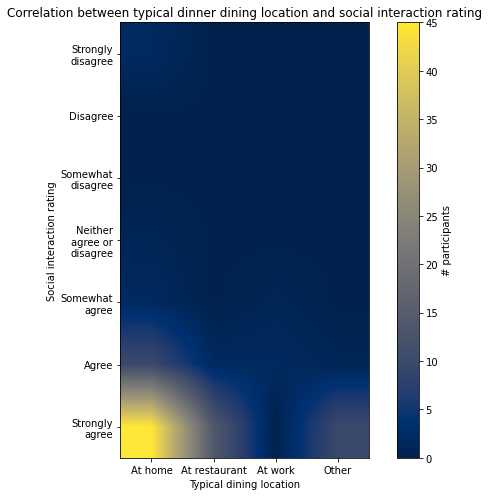

[[0.03333333 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.01666667 0.         0.         0.        ]
 [0.03333333 0.         0.33333333 0.        ]
 [0.16666667 0.125      0.66666667 0.09090909]
 [0.75       0.875      0.         0.90909091]]


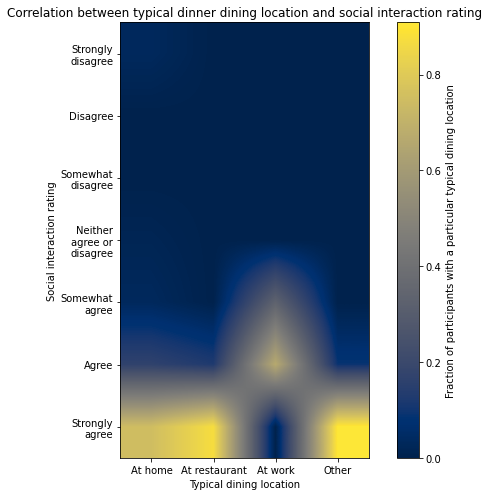

In [34]:
location_labels = {
    'At home': 'At home',
    'At restaurant': 'At restaurant',
    'At work': 'At work',
    'Other, please specify': 'Other'
}
rating_labels = {
    '1  Strongly disagree': 'Strongly\ndisagree',
    '2  Disagree': 'Disagree',
    '3  Somewhat disagree': 'Somewhat\ndisagree',
    '4  Neither agree or disagree': 'Neither\nagree or\ndisagree',
    '5  Somewhat agree': 'Somewhat\nagree',
    '6  Agree': 'Agree',
    '7  Strongly agree': 'Strongly\nagree',
}

for i, meal_type in enumerate(['Breakfast', 'Lunch', 'Dinner']):
    participant_count = np.zeros((len(rating_labels), len(location_labels)))
    print('=' * 120)
    print(meal_type)
    for location_label, rating_label in zip(pre_df[f'S3_{i + 1}'], post_df['Q1_2']):

        idx_x = np.where(np.array(list(location_labels.keys())) == location_label)[0]
        idx_y = np.where(np.array(list(rating_labels.keys())) == rating_label)[0]
        participant_count[idx_y, idx_x] += 1

    print(participant_count)
    plt.figure(figsize=(8, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='# participants', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(np.arange(len(location_labels.values())), location_labels.values())
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical dining location')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} dining location and social interaction rating')
    plt.tight_layout()
    plt.show()

    # Normalize by the total number of participants with a particular typical dining location
    participant_count = np.nan_to_num( participant_count / np.sum(participant_count, axis=0) )
    print(participant_count)
    plt.figure(figsize=(8, 7))
    plt.imshow(participant_count, cmap='cividis', origin='upper', 
        interpolation='bilinear'
    )
    plt.colorbar(label='Fraction of participants with a particular typical dining location', 
        # orientation='horizontal', location='top'
    )
    plt.xticks(np.arange(len(location_labels.values())), location_labels.values())
    plt.yticks(np.arange(len(rating_labels.values())), rating_labels.values())
    plt.xlabel('Typical dining location')
    plt.ylabel(f'Social interaction rating')
    plt.title(f'Correlation between typical {meal_type.lower()} dining location and social interaction rating')
    plt.tight_layout()
    plt.show()


# Further steps

In [85]:
# One could further compute the strength of association between 2 nominal variables
# E.g. using Cramer's V: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html
# Or r-squared / coefficient of determination
